In [13]:
from torch_geometric.datasets import TUDataset
import numpy as np
from sklearn.decomposition import PCA

In [4]:
ds = TUDataset(root='../data', name='ENZYMES', use_node_attr=True)

Processing...
Done!


In [3]:
ds.num_features, ds.num_classes, len(ds)

(21, 6, 600)

In [5]:
ds.x.unique()

tensor([-213.0000, -149.0000,  -16.4100,  ...,  516.9000,  662.4000,
         761.7000])

In [12]:
ds.x

tensor([[11.0000, 15.8870, 37.7800,  ...,  1.0000,  0.0000,  0.0000],
        [11.0000, 16.3629, 40.3800,  ...,  1.0000,  0.0000,  0.0000],
        [16.0000, 21.3951, 63.3500,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [ 4.0000, 10.2377, 20.7000,  ...,  0.0000,  1.0000,  0.0000],
        [ 6.0000, 16.4543, 23.0300,  ...,  0.0000,  1.0000,  0.0000],
        [ 6.0000, 16.9627, 29.1600,  ...,  0.0000,  1.0000,  0.0000]])

In [6]:
ds.x.shape

torch.Size([19580, 21])

In [7]:
ds.num_edge_labels

0

In [8]:
for i in range(ds.num_classes):
    print(i, len(ds[ds.y == i])/len(ds))

0 0.16666666666666666
1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

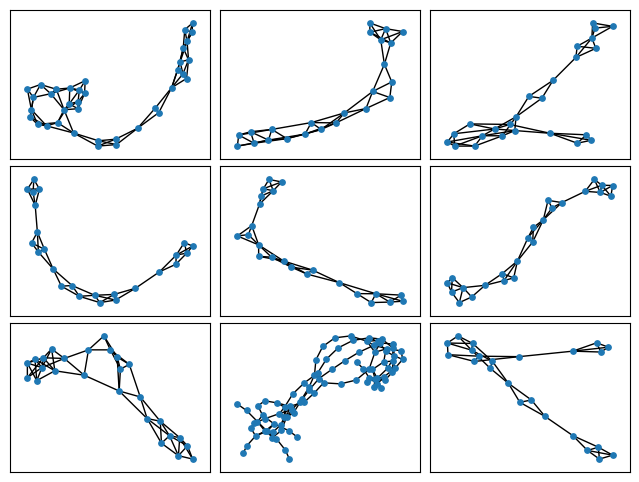

In [11]:
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3, 3, wspace=0.05, hspace=0.05)
axes = gs.subplots()
for i in range(3):
    for j in range(3):
        G = nx.Graph() 
        G.add_edges_from(ds[i*3+j].edge_index.T.tolist())
        nx.draw_networkx(G, ax=axes[i, j], with_labels=False, node_size=15)

In [18]:
pca = PCA(n_components=4)
pca.fit(ds.x)

PCA(n_components=4)

In [19]:
print(pca.explained_variance_ratio_)

[0.95066913 0.02129853 0.01328411 0.00815208]


In [20]:
new_x = pca.transform(ds.x)
new_x

array([[ 36.40428613,  -1.83182024,  -1.0980036 ,  -0.26760471],
       [ 45.41273289,  -2.76545906,  -0.67979914,   0.43145304],
       [ 85.88134408,   1.07934523,   9.16104785,  -1.31089779],
       ...,
       [-26.29124916,   0.65081851,   6.04017777,   0.70657895],
       [-13.55517532,   5.2261589 ,   3.1855528 ,   1.43856329],
       [ -9.91434849,   6.45137025,   8.49117864,   1.44885868]])